<a href="https://colab.research.google.com/github/MrCuastumal/Images-Segmentation/blob/master/Images_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Segmentación Semántica usando el conjunto de datos llamado LandCoverData. 

In [ ]:
! pip install git+https://github.com/divamgupta/image-segmentation-keras
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/divamgupta/image-segmentation-keras to /tmp/pip-req-build-tfilq_ne
  Running command git clone -q https://github.com/divamgupta/image-segmentation-keras /tmp/pip-req-build-tfilq_ne
     |████████████████████████████████| 2.9 MB 5.1 MB/s 
     |████████████████████████████████| 3.3 MB 49.1 MB/s 
  Created wheel for keras-segmentation: filename=keras_segmentation-0.3.0-py3-none-any.whl size=34604 sha256=36f3c6a832d47d5a38eb0aa1445fa00329dd124053917c4a037d46ab5daec27e
  Stored in directory: /tmp/pip-ephem-wheel-cache-arpi5r4b/wheels/78/73/a2/4ee9fce73985dcc4f889d3d012a4461d58254d0de99197af00
Successfully built keras-segmentation
  Attempting uninstall: imageio
    Found existing installation: imageio 2.9.0
    Uninstalling imageio-2.9.0:
      Successfully uninstalled imageio-2.9.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Unins

In [ ]:
!gdown https://drive.google.com/u/0/uc?id=1V6akGw1EbTCJWRa1YSv4jhLLArMUtseN
!unzip -o LandCoverData.zip

Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: LandCoverData/labels/N-33-130-A-d-4-4_316.png  
  inflating: LandCoverData/labels/N-33-139-C-d-2-2_23.png  
  inflating: LandCoverData/labels/N-33-139-C-d-2-2_4.png  
  inflating: LandCoverData/labels/N-33-139-C-d-2-2_16.png  
  inflating: LandCoverData/labels/N-33-130-A-d-4-4_320.png  
  inflating: LandCoverData/labels/N-33-130-A-d-4-4_313.png  
  inflating: LandCoverData/labels/N-33-130-A-d-4-4_317.png  
  inflating: LandCoverData/images/M-33-7-A-d-2-3_76.jpg  
  inflating: LandCoverData/labels/N-33-139-C-d-2-2_12.png  
  inflating: LandCoverData/labels/N-33-130-A-d-4-4_300.png  
  inflating: LandCoverData/labels/N-33-139-C-d-2-2_28.png  
  inflating: LandCoverData/labels/N-33-130-A-d-4-4_315.png  
  inflating: LandCoverData/labels/N-33-139-C-d-2-2_9.png  
  inflating: LandCoverData/labels/N-33-130-A-d-4-4_272.png  
  inflating: LandCoverData/labels/N-33-130-A-d-4-4_308.png  
  inflating: LandCoverData/labels/N

In [ ]:
from keras_segmentation.models.unet import unet
model = unet(n_classes=4 ,  input_height=512, input_width=512  )

In [ ]:
model.train(
    train_images =  "LandCoverData/images",
    train_annotations = "LandCoverData/labels",
    checkpoints_path = "/tmp/unet_1" , epochs=30  
)

Verifying training dataset


100%|██████████| 10674/10674 [01:18<00:00, 136.50it/s]


Dataset verified! 
Epoch 1/30
512/512 [==============================] - ETA: 0s - loss: 0.8846 - accuracy: 0.6635
Epoch 1: saving model to /tmp/unet_1.00001
512/512 [==============================] - 76s 118ms/step - loss: 0.8846 - accuracy: 0.6635
Epoch 2/30
512/512 [==============================] - ETA: 0s - loss: 0.7710 - accuracy: 0.6818
Epoch 2: saving model to /tmp/unet_1.00002
512/512 [==============================] - 61s 120ms/step - loss: 0.7710 - accuracy: 0.6818
Epoch 3/30
512/512 [==============================] - ETA: 0s - loss: 0.7605 - accuracy: 0.6928
Epoch 3: saving model to /tmp/unet_1.00003
512/512 [==============================] - 63s 122ms/step - loss: 0.7605 - accuracy: 0.6928
Epoch 4/30
512/512 [==============================] - ETA: 0s - loss: 0.7207 - accuracy: 0.7083
Epoch 4: saving model to /tmp/unet_1.00004
512/512 [==============================] - 63s 123ms/step - loss: 0.7207 - accuracy: 0.7083
Epoch 5/30
512/512 [==============================] - ETA

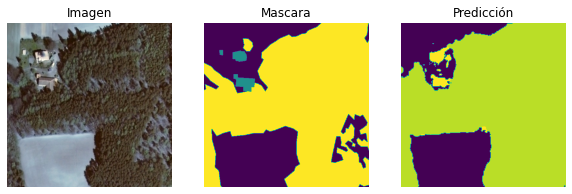

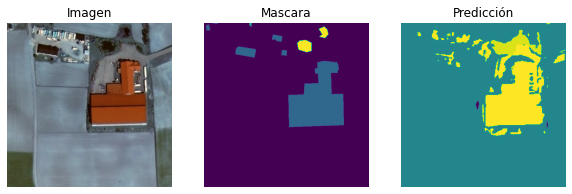

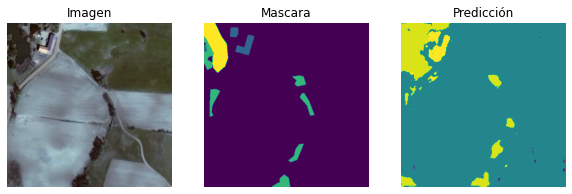

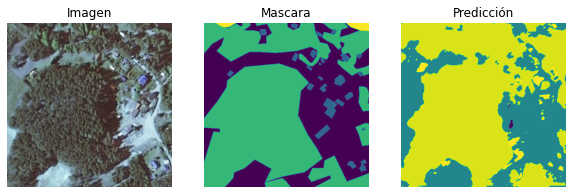

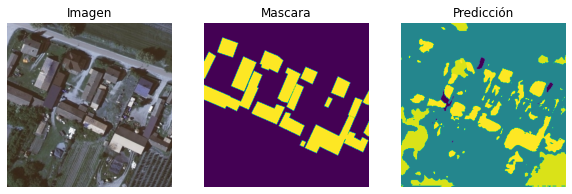

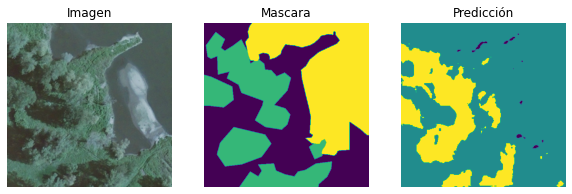

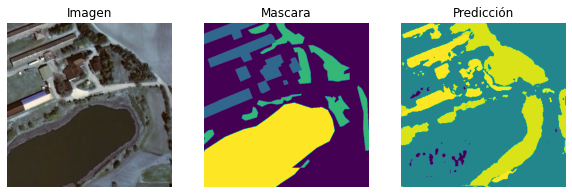

In [ ]:
import cv2
from matplotlib import pyplot as plt
from PIL import Image

def graficar(imm):
  im="LandCoverData/images/"+imm+".jpg"
  lb="LandCoverData/labels/"+imm+".png"
  out = model.predict_segmentation(
    inp=im,
    out_fname="out.png"
  )
  # create figure
  fig = plt.figure(figsize=(10, 7))  
  # setting values to rows and column variables
  rows = 1
  columns = 3
  # reading images
  Image1 = cv2.imread(im)
  Image2 = cv2.imread(lb)
  Image3 = cv2.imread('out.png')

  fig.add_subplot(rows, columns, 1)
  plt.imshow(Image1)
  plt.axis('off')
  plt.title("Imagen")

  fig.add_subplot(rows, columns, 2)
  Image2 = cv2.cvtColor(Image2, cv2.COLOR_BGR2GRAY)
  Image2 = np.asarray(Image2)*85
  plt.imshow(Image2)
  plt.axis('off')
  #plt.colorbar()
  plt.title("Mascara")

  fig.add_subplot(rows, columns, 3)
  Image3 = cv2.cvtColor(Image3, cv2.COLOR_BGR2GRAY)
  plt.imshow(Image3)
  plt.axis('off')
  plt.title("Predicción")
  #plt.colorbar()
  #fig.colorbar(h)

imm="N-33-60-D-c-4-2_1"
graficar(imm)

imm="N-33-60-D-c-4-2_23"
graficar(imm)

imm="N-33-60-D-c-4-2_58"
graficar(imm)

imm="N-33-60-D-d-1-2_9"
graficar(imm)

imm="M-34-5-D-d-4-2_201"
graficar(imm)

imm="N-33-139-C-d-2-2_130"
graficar(imm)

imm="N-33-60-D-c-4-2_40"
graficar(imm)

#### Se coloca 10 imágenes de google earth pro y se reporta los resultados al realizar inferencia sobre el modelo obtenido.

In [ ]:
!gdown https://drive.google.com/uc?id=14Xia7Lg62IF7ljdn-lRFMjYsrB2ne-GF&export=download
!unzip -o imagenes.zip

Downloading...
From: https://drive.google.com/uc?id=14Xia7Lg62IF7ljdn-lRFMjYsrB2ne-GF
To: /content/imagenes.zip
100% 29.9M/29.9M [00:00<00:00, 49.5MB/s]
Archive:  imagenes.zip
  inflating: imagenes/imagen1.jpg    
  inflating: imagenes/imagen10.jpg   
  inflating: imagenes/imagen2.jpg    
  inflating: imagenes/imagen3.jpg    
  inflating: imagenes/imagen4.jpg    
  inflating: imagenes/imagen5.jpg    
  inflating: imagenes/imagen6.jpg    
  inflating: imagenes/imagen7.jpg    
  inflating: imagenes/imagen8.jpg    
  inflating: imagenes/imagen9.jpg    


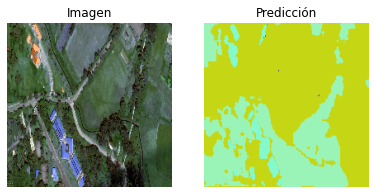

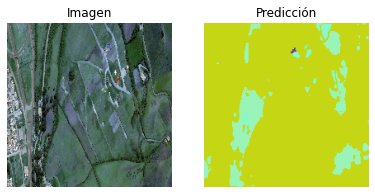

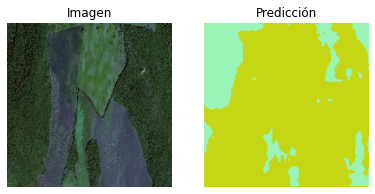

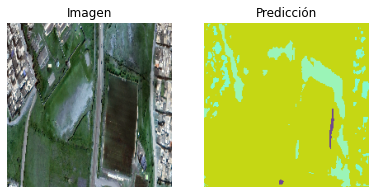

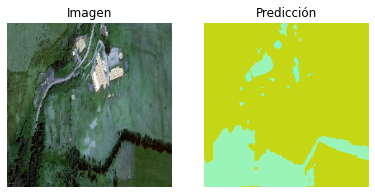

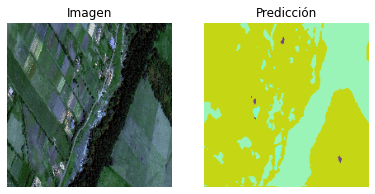

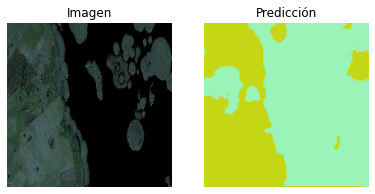

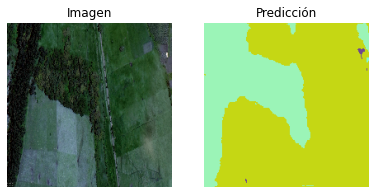

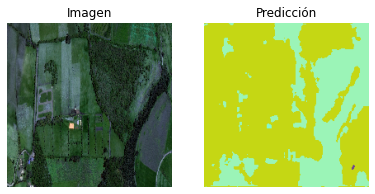

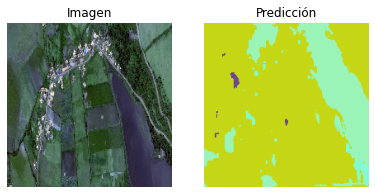

In [ ]:
def graficar(imagen):
  im="/content/imagenes/"+imagen+".jpg"
  Image1 = cv2.imread(im)
  width = 200
  height = 200 
  dim = (width, height)
  im = cv2.resize(Image1, dim)
  out = model.predict_segmentation(
    inp=im,
    out_fname="out.png"
  )
  fig = plt.figure(figsize=(10, 7))  
  rows = 1
  columns = 3
  Image1 = im
  Image2 = cv2.imread('out.png')

  fig.add_subplot(rows, columns, 1)
  plt.imshow(Image1)
  plt.axis('off')
  plt.title("Imagen")

  fig.add_subplot(rows, columns, 2)
  plt.imshow(Image2)
  plt.axis('off')
  plt.title("Predicción")

imagen="imagen1"
graficar(imagen)
imagen="imagen2"
graficar(imagen)
imagen="imagen3"
graficar(imagen)
imagen="imagen4"
graficar(imagen)
imagen="imagen5"
graficar(imagen)
imagen="imagen6"
graficar(imagen)
imagen="imagen7"
graficar(imagen)
imagen="imagen8"
graficar(imagen)
imagen="imagen9"
graficar(imagen)
imagen="imagen10"
graficar(imagen)